In [1]:
import numpy as np
import sys

sys.path.append('../scripts')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from elements import *

import measurement as me

In [17]:
import matplotlib.pyplot as plt
%matplotlib notebook

## Simple Cavity

In the example below we simulate the emmition spectrum of a hot resonator. Here the temperature of the bath is higher than the temperature of the drive and therefore we can see an emmition shaped like a Lorenzian.

<IPython.core.display.Javascript object>


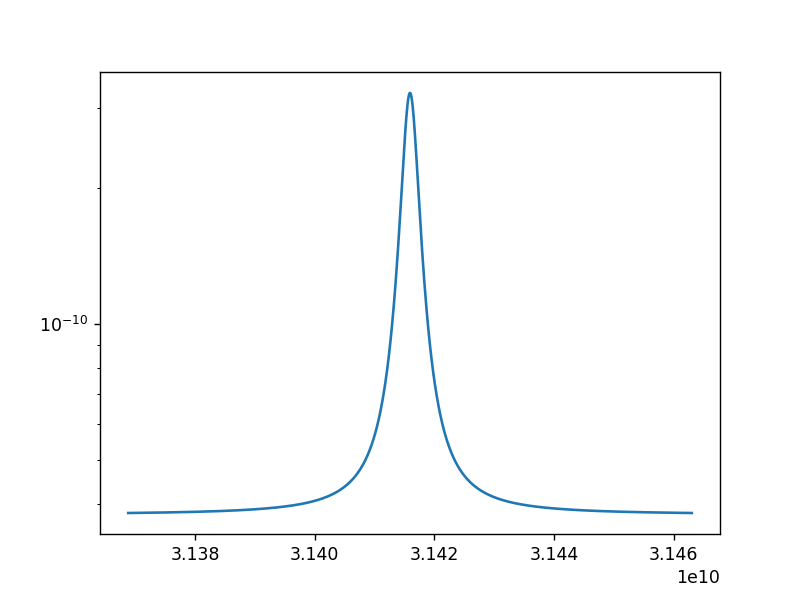

In [19]:
omega_c = 5e9*np.pi*2

kappa_ex = 0.2e6*np.pi*2
kappa_0 = 0.3e6*np.pi*2

kappa = kappa_ex + kappa_0

a = Mode('a', omega_c)

a_inex = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_c, bath_temp=10e-3)
a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=11e-3)

sys_cav = System([a], [a_in0, a_inex], [])

#print (sys_cav.M)

a_outex = Output(sys_cav, a_inex)

omegas = np.linspace(omega_c - 15*kappa, omega_c + 15*kappa, 1000)

spec = [me.spectrum(a_outex,omega) for omega in omegas]
#print (spec)
plt.figure()
plt.semilogy(omegas, spec);